In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## Detect the Contours in the Given Image (using color segmentation).

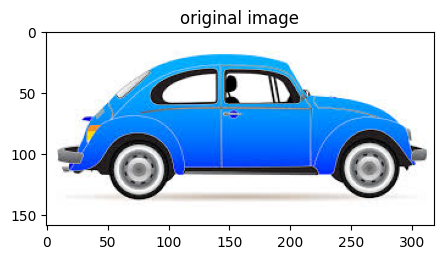

In [26]:
image = cv2.imread('images/beatle.jpg')
imshow('original image', image)

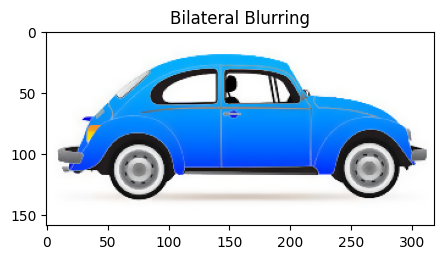

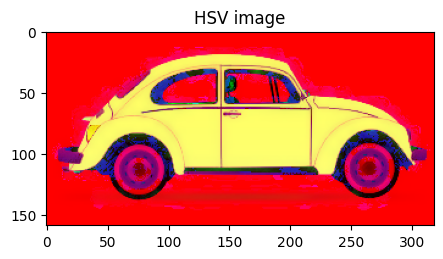

In [27]:
#convert to HSV color space
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow('Bilateral Blurring', bilateral)
hsv = cv2.cvtColor(bilateral, cv2.COLOR_BGR2HSV)
imshow('HSV image', hsv)

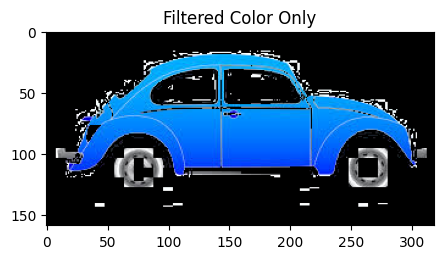

In [28]:
# define range of BLUE color in HSV
lower = np.array([90,0,0])
upper = np.array([135,255,255])

# Convert image from RBG/BGR to HSV so we easily filter
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Use inRange to capture only the values between lower & upper 
mask = cv2.inRange(hsv_img, lower, upper)

# Perform Bitwise AND on mask and our original frame
res = cv2.bitwise_and(image, image, mask=mask)

imshow('Filtered Color Only', res)

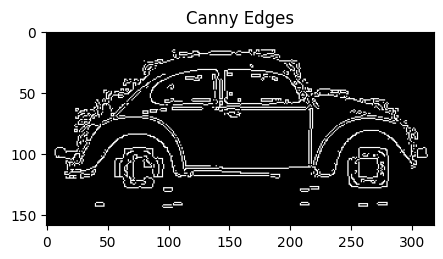

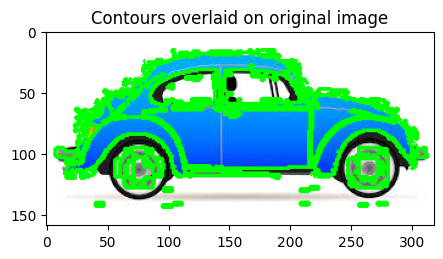

In [29]:
# Convert to Grayscale
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# Canny Edges
edged = cv2.Canny(gray, 150, 255)
imshow('Canny Edges', edged)

# Finding Contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)